# 1D Projection Schemes

There are three 1D algorithms in Chapter 5.  Here are fixed iteration count version in Julia

In [9]:
using LinearAlgebra, SparseArrays
#Steepest Descent Step from Alg 5.2 p138
#Assumption A is SPD
function SteepDes(A,x,p,r)
    alpha = dot(r,r)/dot(p,r)
    x+=alpha*r
    r-=alpha*p
    p=A*r
    return nothing
end

#Minimum Residual Step from Alg 5.3 p140
#Assumption A+A' is SPD
function MinRes(A,x,p,r)
    alpha = dot(p,r)/dot(p,p)
    x=x+alpha*r
    r=r-alpha*p
    p=A*r
    return nothing
end

#Residual Norm Step from Alg 5.4 p142
#Assumption A'A is non-singular
function ResNorm(A,x,r)
    v=A'*r
    Av=A*v
    alpha = dot(v,v)/dot(Av,Av)
    x=x+alpha*v
    r=r-alpha*Av
    return nothing
end
;

# Assumptions
The assumptiions are real:

- Just because an algorithm runs does not mean it is converging! 
- Algorithms will (almost certainly) fail to converge on matrices that fail to satisfy the assumptions.
- SD has the most stringent assuptions followed by MR followed by RN.
- The assumptions for RN are *almost* non existent.

# Comparison
As a test I am going to copare all three on a randomly generated SPD matrix. 

In [56]:
using Plots
# Creating an SPD test problem
m=24; eps=0.1
A=rand(m,m); A=A*A'+ eps*I
x0=rand(m);xStar=sin.(2*pi/m*(1:m));b=A*xStar
# Making Storage for errors ||x-xStar|| and ||b-A*x||
MaxIter=532;
SDErrs=zeros(MaxIter,2); MRerrs=zeros(MaxIter,2); NRErrs=zeros(MaxIter,2)

#Steepest Descent Step from Alg 5.2 p138
#Assumption A is SPD
function SteepDes(A,x,p,r)
    alpha = dot(r,r)/dot(p,r)
    x+=alpha*r
    r-=alpha*p
    p=A*r
    return (x,p,r)
end

function SteepDes2(A,x,p,r)
    alpha = dot(r,r)/dot(p,r)
    x+=alpha*r
    r-=alpha*p
    p=A*r
end

# SD
xPass=copy(x0);r=b-A*x0;p=A*r
@time for i in 1:MaxIter
    (xPass,p,r) = SteepDes(A,xPass,p,r)
end

xNoPass=copy(x0);r=b-A*x0;p=A*r
@time for i in 1:MaxIter
    SteepDes2(A,xNoPass,p,r)
end

(norm(xPass-xStar),norm(xNoPass-xStar))

  0.011052 seconds (7.79 k allocations: 928.986 KiB, 94.31% compilation time)
  0.007275 seconds (5.58 k allocations: 859.451 KiB, 92.25% compilation time)


(0.13184605019321421, 3.637698071073602)

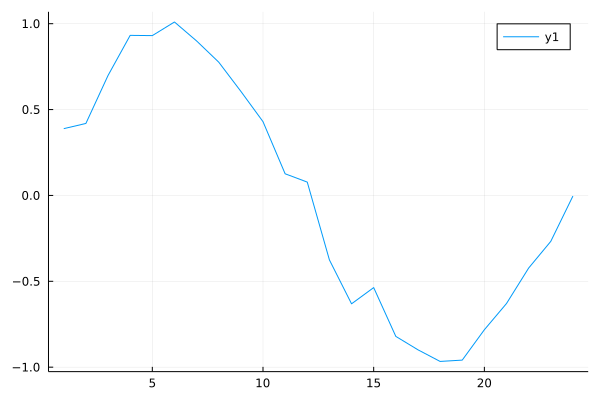

In [54]:
plot(xPass)